In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('Inputs/attacks.csv', encoding='latin')
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
#Test 
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Vemos la cantidad de valores vacios que tenemos en la tabla.
El ratio es muy elevado en la mayoría de las filas.

In [5]:
#dividimos las filas vacias entre el total de filas para ver el de 0 a 1 como de vaias estan las filas de al tabla.

df.isnull().sum().sort_values().head(24)/25723

Case Number               0.661704
original order            0.754733
Date                      0.755005
Case Number.2             0.755005
Case Number.1             0.755005
href                      0.755005
pdf                       0.755005
href formula              0.755044
Year                      0.755083
Type                      0.755161
Investigator or Source    0.755666
Injury                    0.756094
Country                   0.756949
Name                      0.763169
Area                      0.772694
Fatal (Y/N)               0.775959
Location                  0.775998
Activity                  0.776154
Sex                       0.776970
Age                       0.865062
Species                   0.865335
Time                      0.885394
Unnamed: 23               0.999922
Unnamed: 22               0.999961
dtype: float64

Usaremos las columans 'Year', 'Area', 'Fatal (Y/N)' y 'Activity' para mi hipotesis.


In [6]:
#Choose the columns that I will use for my hypothesis
lista_para_limpiar=df[["Year",'Date',"Country","Activity","Fatal (Y/N)"]]
lista_para_limpiar.head(520)

,Year,Date,Country,Activity,Fatal (Y/N)
0,2018.0,25-Jun-2018,USA,Paddling,N
1,2018.0,18-Jun-2018,USA,Standing,N
2,2018.0,09-Jun-2018,USA,Surfing,N
3,2018.0,08-Jun-2018,AUSTRALIA,Surfing,N
4,2018.0,04-Jun-2018,MEXICO,Free diving,N
...,...,...,...,...,...
515,2014.0,12-Aug-2014,USA,Standing,N
516,2014.0,10-Aug-2014,USA,NaN,N
517,2014.0,09-Aug-2014,BAHAMAS,Spearfishing,N
518,2014.0,09-Aug-2014,USA,Swimming,N


In [7]:
lista_para_limpiar.isnull().sum().sort_values().head(24)/25723

Date           0.755005
Year           0.755083
Country        0.756949
Fatal (Y/N)    0.775959
Activity       0.776154
dtype: float64

In [8]:
#Con el método "dropna" vamos a filtrar los valores del df "lista_para_limpiar" para dejar solo aquellos NO nulos.
#Usamos "how='all'" para eliminar  las filas o columnas en las que todos sus elementos sean nulos.
lista_para_limpiar=lista_para_limpiar.dropna(axis=0, how='all')


In [9]:
# Ya no tenemos ningún valor nulo.
lista_para_limpiar.isnull().sum().sort_values(ascending=False).head(20)

Activity       544
Fatal (Y/N)    539
Country         50
Year             2
Date             0
dtype: int64

In [10]:
lista_para_limpiar

,Year,Date,Country,Activity,Fatal (Y/N)
0,2018.0,25-Jun-2018,USA,Paddling,N
1,2018.0,18-Jun-2018,USA,Standing,N
2,2018.0,09-Jun-2018,USA,Surfing,N
3,2018.0,08-Jun-2018,AUSTRALIA,Surfing,N
4,2018.0,04-Jun-2018,MEXICO,Free diving,N
...,...,...,...,...,...
6297,0.0,Before 1903,AUSTRALIA,Diving,Y
6298,0.0,Before 1903,AUSTRALIA,Pearl diving,Y
6299,0.0,1900-1905,USA,Swimming,Y
6300,0.0,1883-1889,PANAMA,NaN,Y


In [11]:
#Eliminamos las filas con el año menor a 1543:
lista_para_limpiar = lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar['Year']<=1963].index)
lista_para_limpiar

,Year,Date,Country,Activity,Fatal (Y/N)
0,2018.0,25-Jun-2018,USA,Paddling,N
1,2018.0,18-Jun-2018,USA,Standing,N
2,2018.0,09-Jun-2018,USA,Surfing,N
3,2018.0,08-Jun-2018,AUSTRALIA,Surfing,N
4,2018.0,04-Jun-2018,MEXICO,Free diving,N
...,...,...,...,...,...
3712,1964.0,01-Jan-1964,AUSTRALIA,NaN,UNKNOWN
3713,1964.0,01-Jan-1964,SOUTH AFRICA,Diving for sinkers,N
3714,1964.0,Jan-1964,NEW ZEALAND,Snorkeling,NaN
3888,1971.0,16-Jul-1961,TURKEY,Swimming,N


In [12]:
lista_para_limpiar["Year"].value_counts().head()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
Name: Year, dtype: int64

In [13]:
lista_para_limpiar.isnull().sum().sort_values(ascending=False).head(20)

Fatal (Y/N)    300
Activity       243
Country         11
Year             2
Date             0
dtype: int64

In [14]:
#Usamos el método fillna para sustituir los valores nulos de la columna 'Year'. Si no lo usamos cuando cambiamos 'Year' aparece el error "Cannot convert non-finite values (NA or inf) to integer"
lista_para_limpiar['Year'] = lista_para_limpiar['Year'].fillna(0)
lista_para_limpiar['Year']

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
3712    1964.0
3713    1964.0
3714    1964.0
3888    1971.0
6079       0.0
Name: Year, Length: 3717, dtype: float64

In [15]:
#Le quitamos el '.0' a los años.
lista_para_limpiar.Year = lista_para_limpiar.Year.astype(int)
lista_para_limpiar

,Year,Date,Country,Activity,Fatal (Y/N)
0,2018,25-Jun-2018,USA,Paddling,N
1,2018,18-Jun-2018,USA,Standing,N
2,2018,09-Jun-2018,USA,Surfing,N
3,2018,08-Jun-2018,AUSTRALIA,Surfing,N
4,2018,04-Jun-2018,MEXICO,Free diving,N
...,...,...,...,...,...
3712,1964,01-Jan-1964,AUSTRALIA,NaN,UNKNOWN
3713,1964,01-Jan-1964,SOUTH AFRICA,Diving for sinkers,N
3714,1964,Jan-1964,NEW ZEALAND,Snorkeling,NaN
3888,1971,16-Jul-1961,TURKEY,Swimming,N


In [16]:
lista_para_limpiar = lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar['Activity']==0].index)

In [17]:
lista_para_limpiar.isnull().sum().sort_values(ascending=False).head(20)

Fatal (Y/N)    300
Activity       243
Country         11
Date             0
Year             0
dtype: int64

In [18]:
lista_para_limpiar.shape

(3717, 5)

In [19]:
lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar.Activity.isnull()].index, inplace = True)

In [20]:
lista_para_limpiar.shape

(3474, 5)

In [21]:
#Quitamos las filas con Nulos de la columna "Activity"
lista_para_limpiar.isnull().sum().sort_values(ascending=False).head(20)

Fatal (Y/N)    246
Country          8
Activity         0
Date             0
Year             0
dtype: int64

In [22]:
lista_para_limpiar['Fatal (Y/N)'] = lista_para_limpiar['Fatal (Y/N)'].fillna(0)

In [23]:
#Quitamos las filas con Nulos de la columna "Fatal (Y/N)"
lista_para_limpiar.isnull().sum().sort_values(ascending=False).head(20)

Country        8
Fatal (Y/N)    0
Activity       0
Date           0
Year           0
dtype: int64

In [24]:
#limpiar nulos.
lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar.Country.isnull()].index, inplace = True)

In [25]:
#Comprobar filas con nulos, no hay ningúno.
lista_para_limpiar.isnull().sum().sort_values(ascending=False).head(20)

Fatal (Y/N)    0
Activity       0
Country        0
Date           0
Year           0
dtype: int64

In [26]:
lista_para_limpiar.shape

(3466, 5)

In [27]:
lista_para_limpiar = lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar['Activity']!="Swimming"].index)


In [28]:
lista_para_limpiar.shape

(469, 5)

In [29]:
lista_para_limpiar = lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar['Fatal (Y/N)']=="UNKNOWN"].index)
lista_para_limpiar = lista_para_limpiar.drop(lista_para_limpiar[lista_para_limpiar['Fatal (Y/N)']==0].index)


In [30]:
def result_of_the_attack(i):
    if i in ["Y", "y"]:
        return "Yes"
    elif i in ["N"," N"]:
        return "No"    

In [31]:

lista_para_limpiar["Fatal (Y/N)"]= lista_para_limpiar["Fatal (Y/N)"].apply(result_of_the_attack)

In [32]:
lista_para_limpiar

,Year,Date,Country,Activity,Fatal (Y/N)
6,2018,03-Jun-2018,BRAZIL,Swimming,Yes
12,2018,13-May-2018,USA,Swimming,No
17,2018,Reported 30-Apr-2018,THAILAND,Swimming,No
26,2018,15-Apr-2018,THAILAND,Swimming,No
33,2018,05-Apr-2018,BAHAMAS,Swimming,No
...,...,...,...,...,...
3699,1964,05-Feb-1964,NEW ZEALAND,Swimming,Yes
3703,1964,Feb-1964,COSTA RICA,Swimming,Yes
3711,1964,04-Jan-1964,FIJI,Swimming,No
3888,1971,16-Jul-1961,TURKEY,Swimming,No


In [33]:
lista_para_limpiar=lista_para_limpiar.rename(columns = {'Fatal (Y/N)':'Fatal'})

In [34]:
date_list=list(lista_para_limpiar["Date"])

In [35]:
date_correction={}

In [36]:
date_correction["month"]=[]

for i in date_list:
    res = re.findall(r"[A-z]{1}\w{2}",i)
    if res:
        date_correction["month"].append(res[0])
    else:
        date_correction["month"].append("")
                     
date_correction["month"]
date_correction


{'month': ['Jun',
  'May',
  'Rep',
  'Apr',
  'Apr',
  'Mar',
  'Feb',
  'Feb',
  'Oct',
  'Oct',
  'Oct',
  'Sep',
  'Sep',
  'Sep',
  'Aug',
  'Jul',
  'Jul',
  'Jun',
  'Jun',
  'Jun',
  'Apr',
  'Apr',
  'Apr',
  'Apr',
  'Apr',
  'Feb',
  'Jan',
  'Jan',
  'Sep',
  'Jul',
  'Jul',
  'Jul',
  'Jul',
  'Jun',
  'Jun',
  'May',
  'May',
  'May',
  'May',
  'May',
  'May',
  'Apr',
  'Mar',
  'Feb',
  'Dec',
  'Nov',
  'Nov',
  'Oct',
  'Sep',
  'Jul',
  'Jun',
  'Rep',
  'Jun',
  'Jun',
  'May',
  'May',
  'Mar',
  'Feb',
  'Sep',
  'Aug',
  'Aug',
  'Aug',
  'Aug',
  'Jul',
  'Jul',
  'Jul',
  'Jul',
  'Jun',
  'May',
  'Apr',
  'Apr',
  'Mar',
  'Mar',
  'Sep',
  'Sep',
  'Sep',
  'Aug',
  'Jul',
  'Jul',
  'Jul',
  'Jun',
  'Jun',
  'Jun',
  'Jun',
  'May',
  'Apr',
  'Apr',
  'Mar',
  'Feb',
  'Dec',
  'Dec',
  'Nov',
  'Oct',
  'Sep',
  'Sep',
  'Aug',
  'Jul',
  'Jun',
  'Jun',
  'Jun',
  'Jun',
  'Jun',
  'Jun',
  'May',
  'Jan',
  'Nov',
  'Oct',
  'Sep',
  'Sep',
  'Aug',
 

In [37]:
df_año = pd.DataFrame(date_correction)
df_año.head()

,month
0,Jun
1,May
2,Rep
3,Apr
4,Apr


In [44]:
df_concat = pd.concat([lista_para_limpiar,df_año], axis=1)
df_concat

,Year,Date,Country,Activity,Fatal,month
0,NaN,NaN,NaN,NaN,NaN,Jun
1,NaN,NaN,NaN,NaN,NaN,May
2,NaN,NaN,NaN,NaN,NaN,Rep
3,NaN,NaN,NaN,NaN,NaN,Apr
4,NaN,NaN,NaN,NaN,NaN,Apr
...,...,...,...,...,...,...
3699,1964.0,05-Feb-1964,NEW ZEALAND,Swimming,Yes,NaN
3703,1964.0,Feb-1964,COSTA RICA,Swimming,Yes,NaN
3711,1964.0,04-Jan-1964,FIJI,Swimming,No,NaN
3888,1971.0,16-Jul-1961,TURKEY,Swimming,No,NaN


In [49]:
#limpiar nulos.
df_concat.drop(df_concat[df_concat.Country.isnull()].index, inplace = True)
df_concat.drop(df_concat[df_concat.month.isnull()].index, inplace = True)

In [50]:

df_concat.isnull().sum().sort_values(ascending=False).head(20)

month       0
Fatal       0
Activity    0
Country     0
Date        0
Year        0
dtype: int64

In [52]:
df_concat

,Year,Date,Country,Activity,Fatal,month
6,2018.0,03-Jun-2018,BRAZIL,Swimming,Yes,Feb
12,2018.0,13-May-2018,USA,Swimming,No,Sep
17,2018.0,Reported 30-Apr-2018,THAILAND,Swimming,No,Jun
26,2018.0,15-Apr-2018,THAILAND,Swimming,No,Jan
33,2018.0,05-Apr-2018,BAHAMAS,Swimming,No,Jun
37,2018.0,9-Mar-2018,AUSTRALIA,Swimming,No,May
40,2018.0,23-Feb-2018,AUSTRALIA,Swimming,No,May
43,2018.0,14-Feb-2018,AUSTRALIA,Swimming,No,Feb
68,2017.0,23-Oct-2017,MAURITIUS,Swimming,No,May
70,2017.0,23-Oct-2017,USA,Swimming,No,Apr


In [61]:
by_country= df_concat.groupby(["Fatal","month","Country"]).agg({"Fatal":"count"})
by_country.head(50)

Fatal
Fatal month Country         
No    Apr   BRAZIL         1
            USA            2
      Aug   AUSTRALIA      1
            SPAIN          2
            USA            1
      Dec   USA            2
      Ear   CHINA          1
      Feb   AUSTRALIA      2
            BRAZIL         1
            USA            4
      Jan   AUSTRALIA      1
            THAILAND       1
            USA            1
      Jul   USA            3
      Jun   BAHAMAS        1
            BRAZIL         1
            THAILAND       1
            USA           10
      Mar   SPAIN          1
            USA            1
      May   AUSTRALIA      2
            MAURITIUS      1
            USA            2
      Nov   USA            1
      Sep   AUSTRALIA      1
            EGYPT          1
            SPAIN          1
            USA            6
Yes   Feb   BRAZIL         1

In [88]:
#Añadimos una columna nueva al df con las decadas.
df_concat["decada"] = pd.cut(df_concat.Year,6, labels=range(1970,2030,10))
df_concat

,Year,Date,Country,Activity,Fatal,month,decada
6,2018.0,03-Jun-2018,BRAZIL,Swimming,Yes,Feb,2020
12,2018.0,13-May-2018,USA,Swimming,No,Sep,2020
17,2018.0,Reported 30-Apr-2018,THAILAND,Swimming,No,Jun,2020
26,2018.0,15-Apr-2018,THAILAND,Swimming,No,Jan,2020
33,2018.0,05-Apr-2018,BAHAMAS,Swimming,No,Jun,2020
37,2018.0,9-Mar-2018,AUSTRALIA,Swimming,No,May,2020
40,2018.0,23-Feb-2018,AUSTRALIA,Swimming,No,May,2020
43,2018.0,14-Feb-2018,AUSTRALIA,Swimming,No,Feb,2020
68,2017.0,23-Oct-2017,MAURITIUS,Swimming,No,May,2000
70,2017.0,23-Oct-2017,USA,Swimming,No,Apr,2000


In [95]:
#testing
by_country= df_concat.groupby(["decada","Country", "Fatal"]).agg({"Fatal":"count"})
by_country

Fatal
decada Country   Fatal       
1970   AUSTRALIA No         1
                 Yes        0
       BAHAMAS   No         0
                 Yes        0
       BRAZIL    No         0
...                       ...
2020   SPAIN     Yes        0
       THAILAND  No         2
                 Yes        0
       USA       No         1
                 Yes        0

[108 rows x 1 columns]

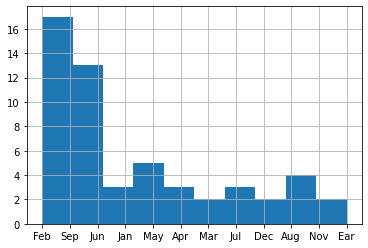

In [98]:
#la mayoría de los ataques mientras las victimas nadaban se concentran en los meses de verano.
df_concat["month"].hist()

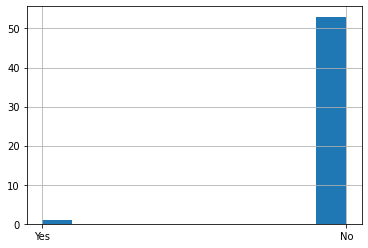

In [105]:
# La mayoría de los ataques mientras las victimas estaban nadando no son mortales.
df_concat["Fatal"].hist()